<a href="https://colab.research.google.com/github/Tanishqchahal/Exploring_Bitcoin_Cryptocurrency_Market/blob/main/Bitcoin_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
data = pd.read_csv('coinmarketcap_06122017.csv')
data.shape

(1326, 16)

In [53]:
data.head()

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


In [54]:
data = data.drop(columns=['Unnamed: 0'])

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   24h_volume_usd      1270 non-null   float64
 1   available_supply    1031 non-null   float64
 2   id                  1326 non-null   object 
 3   last_updated        1326 non-null   int64  
 4   market_cap_usd      1031 non-null   float64
 5   max_supply          215 non-null    float64
 6   name                1326 non-null   object 
 7   percent_change_1h   1273 non-null   float64
 8   percent_change_24h  1270 non-null   float64
 9   percent_change_7d   1283 non-null   float64
 10  price_btc           1326 non-null   float64
 11  price_usd           1326 non-null   float64
 12  rank                1326 non-null   int64  
 13  symbol              1326 non-null   object 
 14  total_supply        1211 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 155.5

In [56]:
data.isna().sum()

24h_volume_usd          56
available_supply       295
id                       0
last_updated             0
market_cap_usd         295
max_supply            1111
name                     0
percent_change_1h       53
percent_change_24h      56
percent_change_7d       43
price_btc                0
price_usd                0
rank                     0
symbol                   0
total_supply           115
dtype: int64

In [57]:
top10_market_cap = data[data['market_cap_usd']>0]

In [58]:
top10_market_cap = top10_market_cap.head(10)
top10_market_cap = top10_market_cap.assign(market_cap_perc = (top10_market_cap['market_cap_usd']/top10_market_cap['market_cap_usd'].sum())*100)

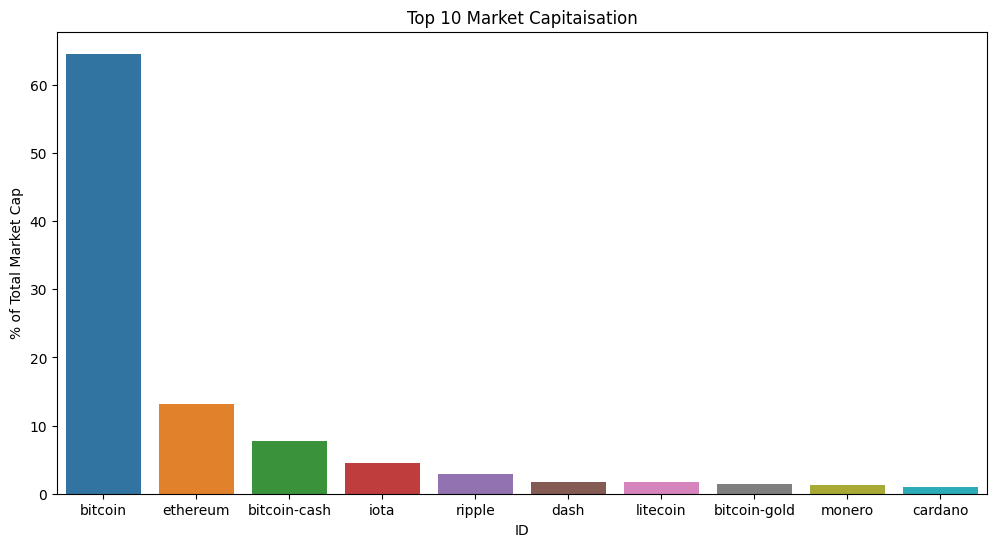

In [59]:
plt.figure(figsize=(12,6))
sns.barplot(data=top10_market_cap,x='id',y='market_cap_perc',hue='id')
plt.title('Top 10 Market Capitaisation')
plt.xlabel('ID')
plt.ylabel('% of Total Market Cap')
plt.show()

In [61]:
volatility = data[['id','percent_change_24h','percent_change_7d']]
volatility = volatility.set_index('id').dropna()
volatility = volatility.sort_values('percent_change_24h',ascending=True)
volatility.head(5)

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


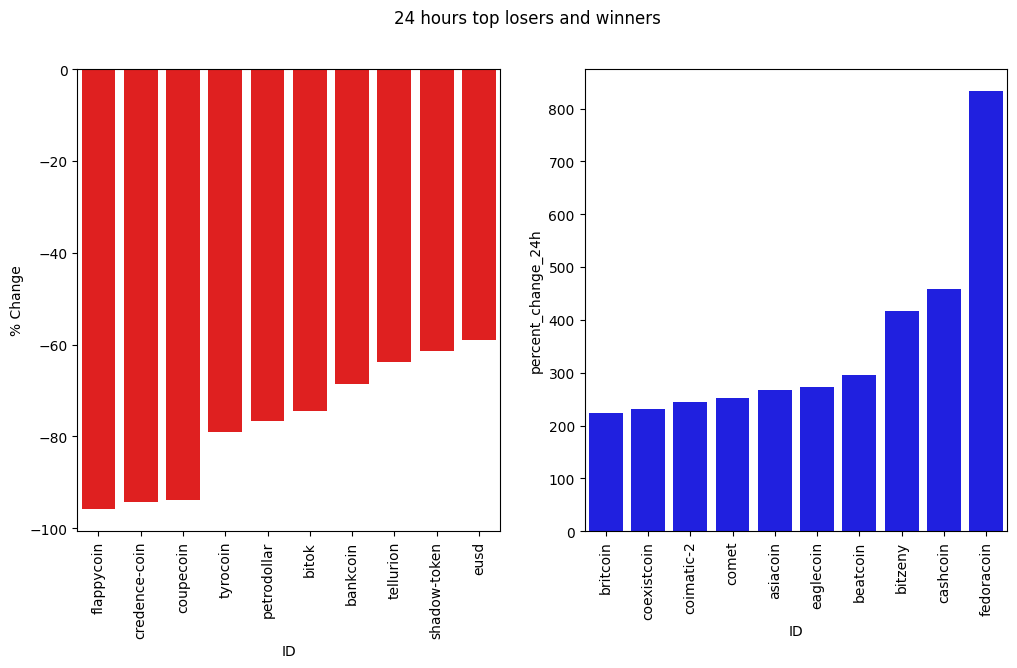

In [72]:
fig,axes = plt.subplots(1,2,figsize=(12,6))
sns.barplot(data=volatility[:10], x='id',y='percent_change_24h',color='red',ax=axes[0])
sns.barplot(data=volatility[-10:], x='id',y='percent_change_24h',color='blue',ax=axes[1])
fig.suptitle('24 hours top losers and winners')
axes[0].tick_params('x',labelrotation=90)
axes[1].tick_params('x',labelrotation=90)
axes[0].set_xlabel('ID')
axes[1].set_xlabel('ID')
axes[0].set_ylabel('% Change')
plt.show()

In [73]:
volatility_7d = volatility.sort_values('percent_change_7d',ascending=True)
volatility_7d.head(5)

,percent_change_24h,percent_change_7d
id,,
royalties,-9.06,-99.59
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
cagecoin,-36.26,-92.68
tyrocoin,-79.02,-87.43


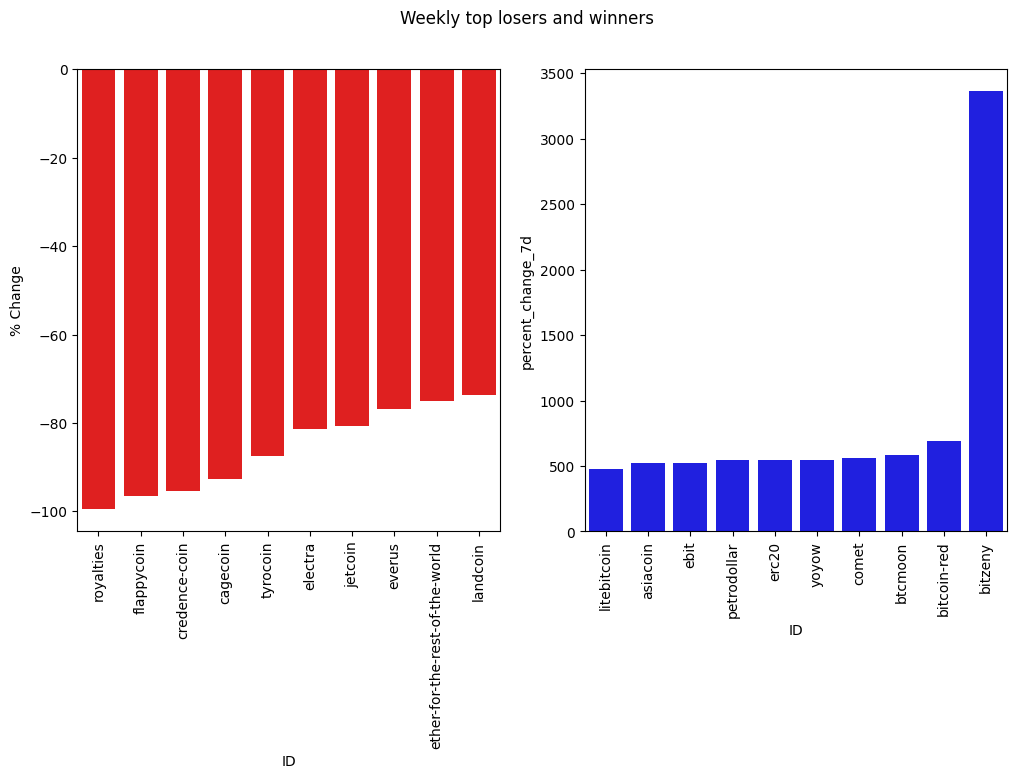

In [74]:
fig,axes = plt.subplots(1,2,figsize=(12,6))
sns.barplot(data=volatility_7d[:10], x='id',y='percent_change_7d',color='red',ax=axes[0])
sns.barplot(data=volatility_7d[-10:], x='id',y='percent_change_7d',color='blue',ax=axes[1])
fig.suptitle('Weekly top losers and winners')
axes[0].tick_params('x',labelrotation=90)
axes[1].tick_params('x',labelrotation=90)
axes[0].set_xlabel('ID')
axes[1].set_xlabel('ID')
axes[0].set_ylabel('% Change')
plt.show()

In [76]:
large_caps = data[data['market_cap_usd']>10000000000]
large_caps[['id','market_cap_usd']]

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
